In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#reading the dataset
dataset=pd.read_csv("video_games.csv")

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6825 non-null   int64  
 1   name             6825 non-null   object 
 2   platform         6825 non-null   object 
 3   year_of_release  6825 non-null   int64  
 4   genre            6825 non-null   object 
 5   publisher        6825 non-null   object 
 6   na_sales         6825 non-null   float64
 7   eu_sales         6825 non-null   float64
 8   jp_sales         6825 non-null   float64
 9   other_sales      6825 non-null   float64
 10  global_sales     6825 non-null   float64
 11  critic_score     6825 non-null   float64
 12  critic_count     6825 non-null   float64
 13  user_score       6825 non-null   float64
 14  user_count       6825 non-null   float64
 15  developer        6825 non-null   object 
 16  rating           6825 non-null   object 
dtypes: float64(9),

In [3]:
# Drop the null columns where all values are null
dataset.drop(columns=dataset.columns[0], axis=1, inplace=True)
dataset

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,Game Boy Advance,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,Game Boy Advance,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


In [4]:
# set the index of dataset to name
dataset.drop(['name', 'developer'], axis=1, inplace=True)

In [5]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['platform']= label_encoder.fit_transform(dataset['platform'])
dataset['genre']= label_encoder.fit_transform(dataset['genre']) 
dataset['publisher']= label_encoder.fit_transform(dataset['publisher']) 
# dataset['developer']= label_encoder.fit_transform(dataset['developer']) 
dataset['rating']= label_encoder.fit_transform(dataset['rating']) 
print(dataset.head())

   platform  year_of_release  genre  publisher  na_sales  eu_sales  jp_sales  \
0        12             2006     10        160     41.36     28.96      3.77   
1        12             2008      6        160     15.68     12.76      3.79   
2        12             2009     10        160     15.61     10.93      3.28   
3         1             2006      4        160     11.28      9.14      6.50   
4        12             2006      3        160     13.96      9.18      2.93   

   other_sales  global_sales  critic_score  critic_count  user_score  \
0         8.45         82.53          76.0          51.0         8.0   
1         3.29         35.52          82.0          73.0         8.3   
2         2.95         32.77          80.0          73.0         8.0   
3         2.88         29.80          89.0          65.0         8.5   
4         2.84         28.92          58.0          41.0         6.6   

   user_count  rating  
0       322.0       1  
1       709.0       1  
2       192.0 

In [6]:
x = dataset['critic_score'].values
y = dataset['global_sales'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
# # create test and train and drop global sales
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(dataset.drop('global_sales', axis=1), dataset.global_sales,
#                                                     test_size=.25, random_state=0)

In [9]:
x_train

array([80., 76., 80., ..., 80., 75., 74.])

In [10]:
y_train

array([3.49, 0.24, 4.76, ..., 0.21, 0.41, 0.05])

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [12]:
regressor.fit(x_train.reshape(-1,1), y_train.reshape(-1,1))

LinearRegression()

In [13]:
y_pred = regressor.predict(x_test.reshape(-1,1))

In [14]:
# regressor.fit(x_train, y_train)

In [15]:
# y_pred = regressor.predict(x_test)

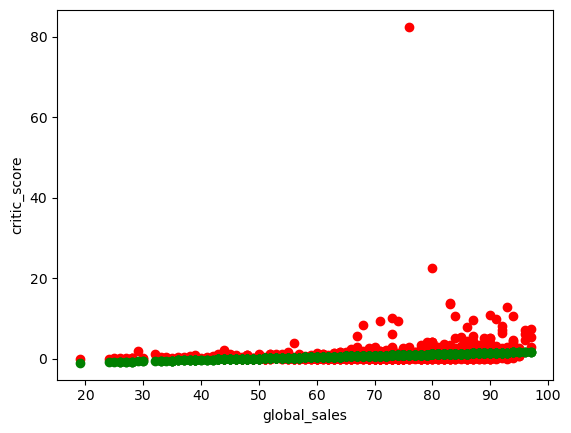

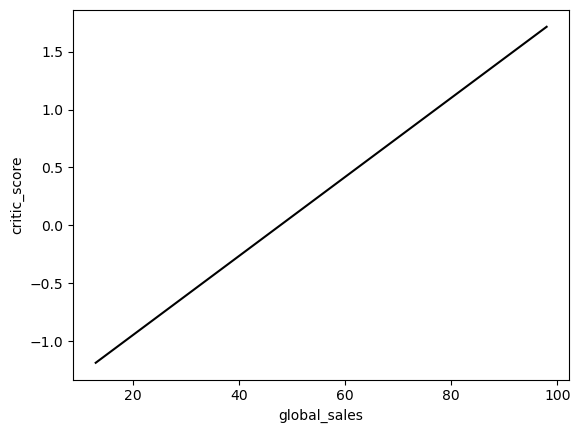

In [19]:
# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x_test, y_test, color = 'red')
plt.scatter(x_test, y_pred, color = 'green')
plt.title('')
plt.xlabel('global_sales')
plt.ylabel('critic_score')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('')
plt.xlabel('global_sales')
plt.ylabel('critic_score')
plt.show()

In [21]:
#calculate mean absolute error
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.8085123110490707


In [22]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 6.9136067246736985


In [23]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2.629373827487012


In [24]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 0.9667457294341484


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.02721698022306518


In [26]:
n=6825
k=1
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.027074406132521878
